## 라이브러리 로드

In [1]:
# pandas, numpy
import pandas as pd
import numpy as np

In [2]:
# 시각화 관련 matplotlib, seaborn, koreanize_matplotlib
# !pip install koreanize-matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 텍스트 데이터 로드

In [4]:
df = pd.read_csv("data/shop-review.csv")
df.shape

(5996, 4)

In [5]:
df.head()

,title,content,product,mallName
0,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로2세대,애플 공식 브랜드스토어
1,&lt;새로운 것과 좋았던 것의 균형감&gt;1. 노이즈 캔슬링에어팟 1세대 대비 ...,&lt;새로운 것과 좋았던 것의 균형감&gt;<br><br><br>1. 노이즈 캔슬...,에어팟프로2세대,애플 공식 브랜드스토어
2,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,에어팟프로2세대,애플 공식 브랜드스토어
3,먼저 빠른배송 감사합니다. 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고있습...,먼저 <em>빠른배송 감사합니다</em>. 21일 12시에 받고 현재 2시간동안 귀...,에어팟프로2세대,애플 공식 브랜드스토어
4,에어팟 프로 2세대 구매&amp; 사용 후기 1. 가격&amp;배송 우선 애플...,에어팟 프로 2세대 구매&amp; 사용 후기<br> 1. 가격&amp;배송<br> ...,에어팟프로2세대,애플 공식 브랜드스토어


In [6]:
# product unique
df["product"].unique()

array(['에어팟프로2세대', '선크림', '물티슈'], dtype=object)

In [7]:
# value_counts
df["product"].value_counts()

product
물티슈         2000
선크림         1999
에어팟프로2세대    1997
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product'>

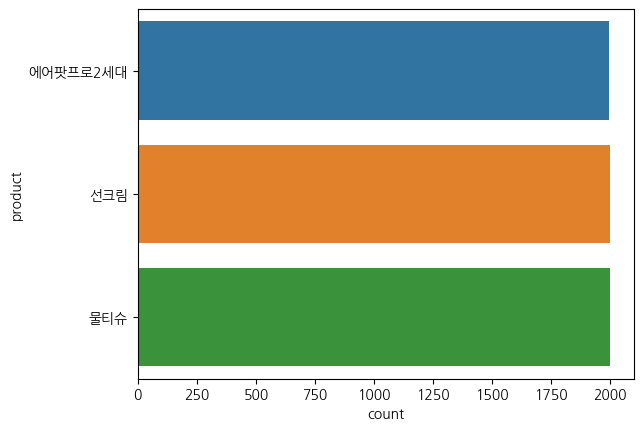

In [9]:
# countplot
sns.countplot(data=df, y="product")

## 전처리
* HTML 태그와 엔티티 제거

In [12]:
# <.*?>|&[^;]+;
df["title_re"] = df["title"].str.replace("<.*?>|&[^;]+;", " ", regex=True)
df["content_re"] = df["content"].str.replace("<.*?>|&[^;]+;", " ", regex=True)
df

,title,content,product,mallName,title_re,content_re
0,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로2세대,애플 공식 브랜드스토어,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...
1,&lt;새로운 것과 좋았던 것의 균형감&gt;1. 노이즈 캔슬링에어팟 1세대 대비 ...,&lt;새로운 것과 좋았던 것의 균형감&gt;<br><br><br>1. 노이즈 캔슬...,에어팟프로2세대,애플 공식 브랜드스토어,새로운 것과 좋았던 것의 균형감 1. 노이즈 캔슬링에어팟 1세대 대비 좋아진 것을...,새로운 것과 좋았던 것의 균형감 1. 노이즈 캔슬링 에어팟 1세대 대비 좋...
2,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,에어팟프로2세대,애플 공식 브랜드스토어,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...,번개 같은 빠름으로? 사전예약 후 지난 10월 21일 수령해서 지금까지 한달 넘게 ...
3,먼저 빠른배송 감사합니다. 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고있습...,먼저 <em>빠른배송 감사합니다</em>. 21일 12시에 받고 현재 2시간동안 귀...,에어팟프로2세대,애플 공식 브랜드스토어,먼저 빠른배송 감사합니다. 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고있습...,먼저 빠른배송 감사합니다 . 21일 12시에 받고 현재 2시간동안 귀에서 빼지않고...
4,에어팟 프로 2세대 구매&amp; 사용 후기 1. 가격&amp;배송 우선 애플...,에어팟 프로 2세대 구매&amp; 사용 후기<br> 1. 가격&amp;배송<br> ...,에어팟프로2세대,애플 공식 브랜드스토어,에어팟 프로 2세대 구매 사용 후기 1. 가격 배송 우선 애플 공식 인증 스...,에어팟 프로 2세대 구매 사용 후기 1. 가격 배송 우선 애플 공식 인...
...,...,...,...,...,...,...
5991,늘 쓰는 상품이에요,늘 쓰는 상품이에요,물티슈,미엘물티슈,늘 쓰는 상품이에요,늘 쓰는 상품이에요
5992,또 주문했어요 근데 이번에는 좀 바꼈네요?? 처음본 로고가 있네요 ㅎㅎ,또 주문했어요 근데 이번에는 좀 바꼈네요?? 처음본 로고가 있네요 ㅎㅎ,물티슈,미엘물티슈,또 주문했어요 근데 이번에는 좀 바꼈네요?? 처음본 로고가 있네요 ㅎㅎ,또 주문했어요 근데 이번에는 좀 바꼈네요?? 처음본 로고가 있네요 ㅎㅎ
5993,오랜만에 미엘 물티슈~가격대비 물디슈평량 용량 대비만족입니다!,오랜만에 미엘 물티슈~<br>가격대비 물디슈평량 용량 대비<br>만족입니다!,물티슈,미엘물티슈,오랜만에 미엘 물티슈~가격대비 물디슈평량 용량 대비만족입니다!,오랜만에 미엘 물티슈~ 가격대비 물디슈평량 용량 대비 만족입니다!
5994,쓰기 편하고좋아요,쓰기 편하고<br>좋아요,물티슈,미엘물티슈,쓰기 편하고좋아요,쓰기 편하고 좋아요


## TF-IDF
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [13]:
df.head(2)

,title,content,product,mallName,title_re,content_re
0,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로2세대,애플 공식 브랜드스토어,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...,에어팟프로1세대를 계속 사용 했으나 배터리 빠른 소모로 인해 2세대로 교체 했습니다...
1,&lt;새로운 것과 좋았던 것의 균형감&gt;1. 노이즈 캔슬링에어팟 1세대 대비 ...,&lt;새로운 것과 좋았던 것의 균형감&gt;<br><br><br>1. 노이즈 캔슬...,에어팟프로2세대,애플 공식 브랜드스토어,새로운 것과 좋았던 것의 균형감 1. 노이즈 캔슬링에어팟 1세대 대비 좋아진 것을...,새로운 것과 좋았던 것의 균형감 1. 노이즈 캔슬링 에어팟 1세대 대비 좋...


In [17]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer(max_features=2000)
tfidfvect

TfidfVectorizer(max_features=2000)

In [135]:
dtm_tfidf = tfidfvect.fit_transform(df["title_re"] + " " + df["content_re"]+ " " + df["product"])
dtm_tfidf

<5996x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 72089 stored elements in Compressed Sparse Row format>

In [136]:
df_dtm_tfidf = pd.DataFrame(dtm_tfidf.toarray(), 
                            columns=tfidfvect.get_feature_names_out())
df_dtm_tfidf.head(2)

,10,100,100매,100매라,100매에,10월,10팩,11번가,11번가에서,1년,...,회사에서도,효과,효과가,후기,후기가,후기를,후기보고,훌륭합니다,훨씬,흡수도
0,0.079696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031364,...,0.0,0.0,0.029016,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

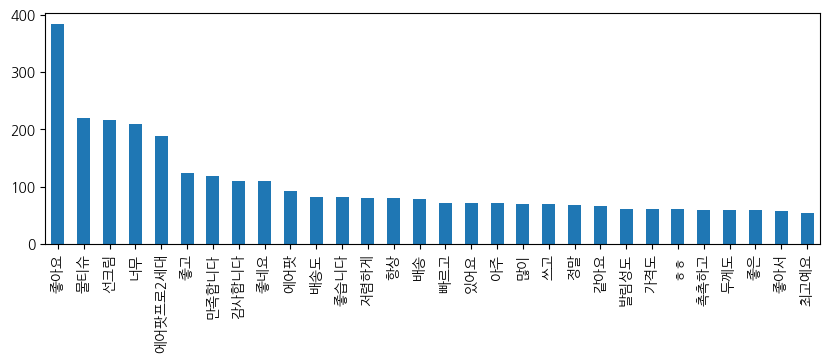

In [137]:
df_dtm_tfidf.sum().nlargest(30).plot(kind="bar", figsize=(10, 3))

## 군집화

## KMeans

* [2.3. Clustering — scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html#k-means)
*
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [138]:
X = df_dtm_tfidf.values
X

array([[0.07969557, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04885186, 0.04494495, 0.        , ..., 0.        , 0.03685102,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [139]:
# cluster.KMeans, metrics.silhouette_score 불러오기
# rfm_norm 값을 학습하고
# elbow 값을 보기위해 inertia_ 값을 리스트로 만듭니다.
# silhouette_score(X, kmeans.labels_) 값도 리스트로 만듭니다.


# KMeans(
#     n_clusters=8,
#     *,
#     init='k-means++',
#     n_init=10,
#     max_iter=300,
#     tol=0.0001,
#     verbose=0,
#     random_state=None,
#     copy_x=True,
#     algorithm='lloyd',
# )

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import trange

inertia = []
silhouettes = []

for n in trange(2, 20):
    kmeans = KMeans(n_clusters=n, n_init="auto", random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:29<00:00,  1.62s/it]


## Elbow Method

* Number of clusters
* Within-Cluster Sum of Square

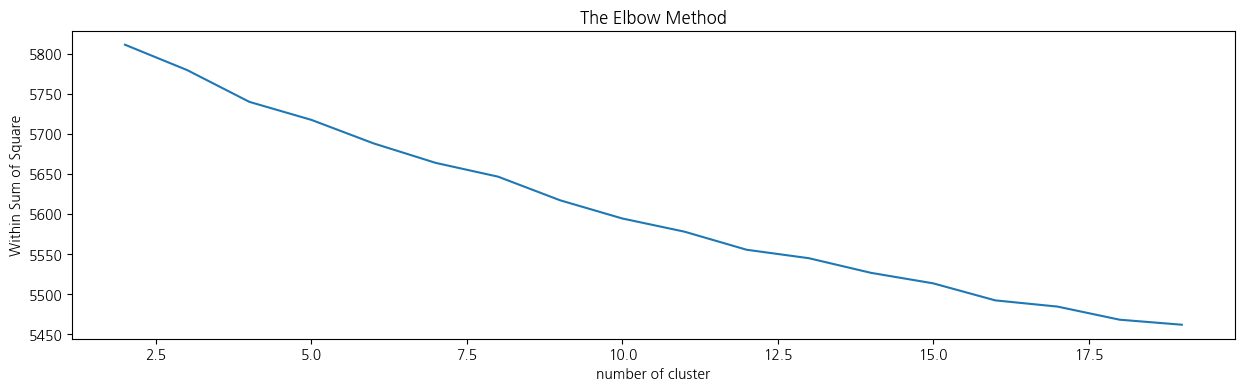

In [140]:
plt.figure(figsize=(15,4))

plt.plot(range(2, 20), inertia)
plt.title("The Elbow Method")
plt.xlabel("number of cluster")
plt.ylabel("Within Sum of Square")
plt.show()

## Silhouette Score


군집화 평가 방법으로 실루엣 분석(Shilhouette Analysis)이 있습니다. 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냅니다. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미입니다. 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것입니다.

* 좋은 군집화가 되기 위한 기준 조건
    * 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 -1~1 사이의 값을 가지며, 1에 가까울수록 좋습니다.
    * 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 합니다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요합니다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아닙니다.

* https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

정답 레이블을 모르는 경우 모델 자체를 사용하여 평가를 수행해야 합니다. 실루엣 계수( sklearn.metrics.silhouette_score)는 이러한 평가의 한 예이며 실루엣 계수 점수가 높을수록 클러스터가 더 잘 정의된 모델과 관련됩니다. 실루엣 계수는 각 샘플에 대해 정의되며 두 가지 점수로 구성됩니다.

* a : 샘플과 동일한 클래스의 다른 모든 점 사이의 평균 거리.
* b : 표본과 다음으로 가장 가까운 군집 의 다른 모든 점 사이의 평균 거리
* 단일 샘플에 대한 실루엣 계수 s 는 다음과 같이 주어집니다.
    * `s = (b-a)/max(a,b)`
    

* 사이킷런의 실루엣 분석 메서드

* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

* `silhouette_samples(X, labels, metric='euclidean', **kwds)` : X feature 데이터 세트와 각 feature데이터 세트가 속한 군집 레이블 값인 labels데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환합니다.
* `silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)`: 인자로 X feature데이터 세트와 각 feature 데이터 세트가 속한 레이블 값인 labels데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환합니다. 즉 np.mean(silhouette_samples())입니다. 일반적으로 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단할 수 있습니다. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없습니다.

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score


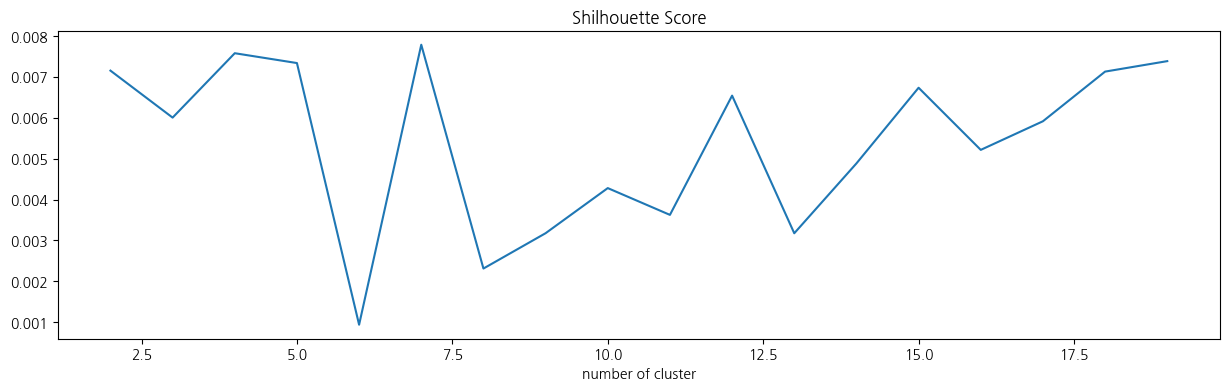

In [141]:
# 실루엣 점수가 높은 클러스터 수는 데이터가 잘 그룹화되어 있음을 나타냅니다.
plt.figure(figsize=(15, 4))
plt.plot(range(2, 20), silhouettes)
plt.title("Shilhouette Score")
plt.xlabel("number of cluster")
plt.show()

## 클러스터의 수를 정해서 군집화 하기

In [142]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [143]:
(kmeans.labels_ == kmeans.predict(X)).mean()

1.0

In [144]:
df["cluster"] = kmeans.labels_
df["cluster"].value_counts()

cluster
2    1934
3    1852
0    1654
1     556
Name: count, dtype: int64

In [145]:
# silhouette_score 구하기
silhouette_avg = silhouette_score(X, kmeans.labels_)
silhouette_avg

0.0075788223096755645

### 실루엣 분석 시각화 
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

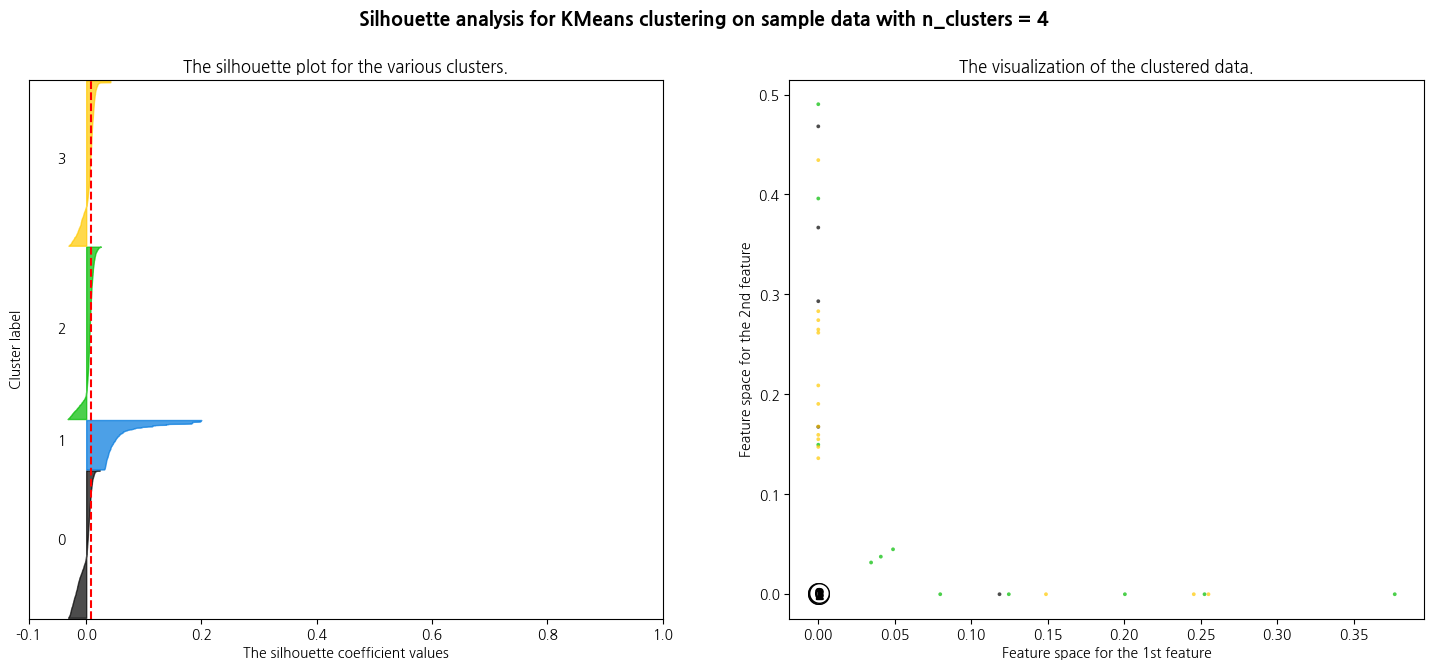

In [146]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()

### 실제 제품과 군집 비교

In [148]:
# crosstab product, kmeans
pd.crosstab(df["product"], df["cluster"]).style.background_gradient(axis=None)

cluster,0,1,2,3
product,,,,
물티슈,8,99,68,1825
선크림,1643,280,55,21
에어팟프로2세대,3,177,1811,6


<Axes: xlabel='cluster', ylabel='count'>

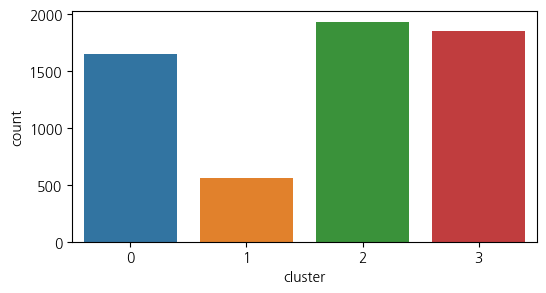

In [149]:
# countplot
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x="cluster")

## 각 군집별 키워드 TF-IDF 값 합계 순위

In [150]:
def kmeans_tfidf(no):
    df_cluster = df_dtm_tfidf.loc[df[df["cluster"] == no].index]
    df_cluster.sum().nlargest(20).plot(kind="bar", figsize=(6, 3))

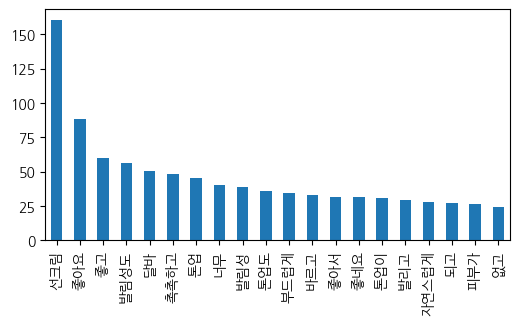

In [151]:
# 군집별 TF-IDF 키워드 시각화

kmeans_tfidf(no=0)

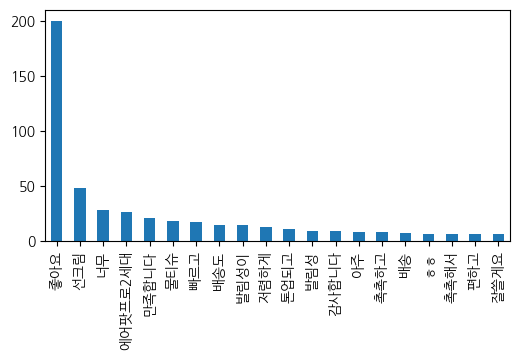

In [152]:
kmeans_tfidf(no=1)

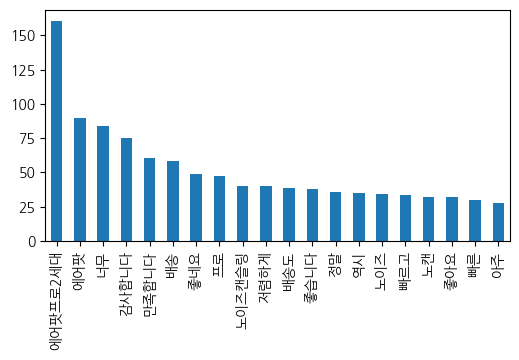

In [154]:
kmeans_tfidf(no=2)

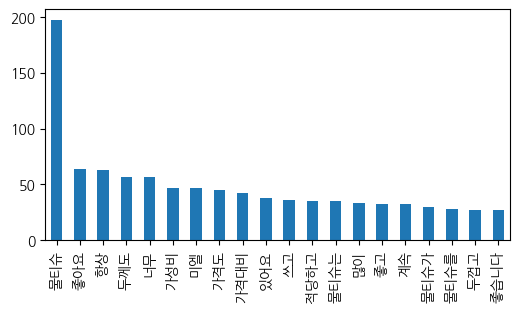

In [155]:
kmeans_tfidf(no=3)